## Exploratory Data Analysis

### Extract and load the dataset

In [18]:
import os
import sys

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Import the load_data function from your custom module
from data_processing import load_data 


# Define paths
zip_file_path = '../Data/raw_analyst_ratings.csv.zip'  # Path to the .zip file
extracted_folder_path = '../Data'  # Path where the files will be extracted

In [19]:
# Load the dataset to the dataframe

df = load_data(zip_file_path, 'raw_analyst_ratings.csv')

In [20]:
# explore the the first 5 rows
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


In [21]:
# Check the size of the dataset
df.shape

(1407328, 5)

In [22]:
# checking missing values
df.isnull().sum()

headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [23]:
# check the data types
df.dtypes

headline                  object
url                       object
publisher                 object
date         datetime64[ns, UTC]
stock                     object
dtype: object

In [24]:
# check the uniqueness of the data
# Duplicate rows
print("\nDuplicate rows:")
df[df.duplicated()].reset_index()


Duplicate rows:


,index,headline,url,publisher,date,stock
0,562357,"Top Performing Industries For July 1, 2015",https://www.benzinga.com/news/15/07/5642290/to...,Lisa Levin,2015-07-01 00:00:00+00:00,GME


In [26]:
# drop duplicated rows
df = df.drop_duplicates().reset_index()

## Descriptive Statistics

In [28]:
# import eda
import eda

# Descriptive statistics
print("Headline Length Statistics:")
print(eda.headline_length_stats(df))

Headline Length Statistics:
count    1.407327e+06
mean     7.312054e+01
std      4.073532e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


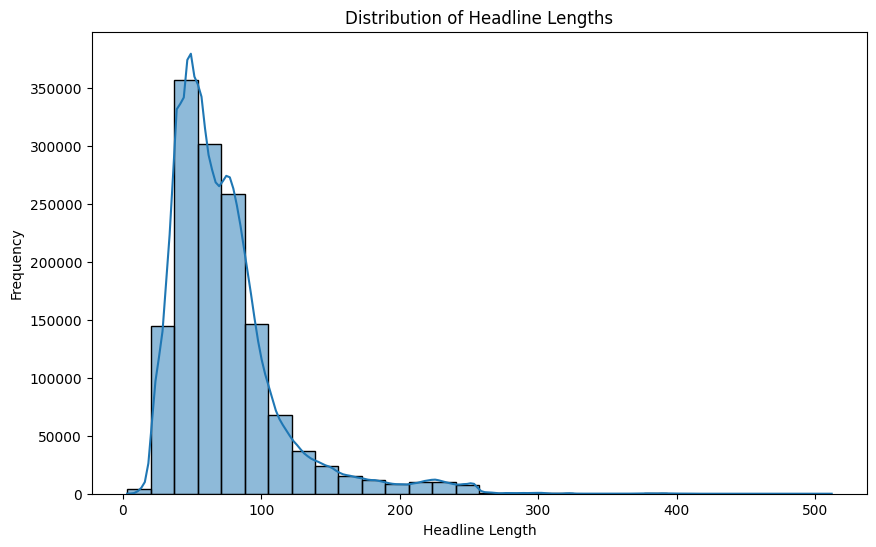

In [29]:
# Plot the distribution of headline lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

Summary of the Distribution Plot:

According to the descriptive statistics and distribution plot above, we can conclude that the distribution is heavily skewed to the right. This indicates that most headlines are relatively short, while a smaller number of headlines are significantly longer.

The peak of the distribution is around 50-70 characters, indicating that this is the most common headline length.

In summary, the distribution of headline lengths is right-skewed with a peak around 50-70 characters and a long tail extending towards longer headlines. Most headlines are relatively short, but a few are significantly longer.

### Count the most active publishers

In [35]:
print("Top Publishers:")
publisher_counts = eda.articles_per_publisher(df).reset_index(name="no_of_articles")
top_publisher = publisher_counts.head(10)
top_publisher

Top Publishers:


,publisher,no_of_articles
0,Paul Quintaro,228373
1,Lisa Levin,186978
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
5,Eddie Staley,57254
6,Hal Lindon,49047
7,ETF Professor,28489
8,Juan Lopez,28438
9,Benzinga Staff,28114


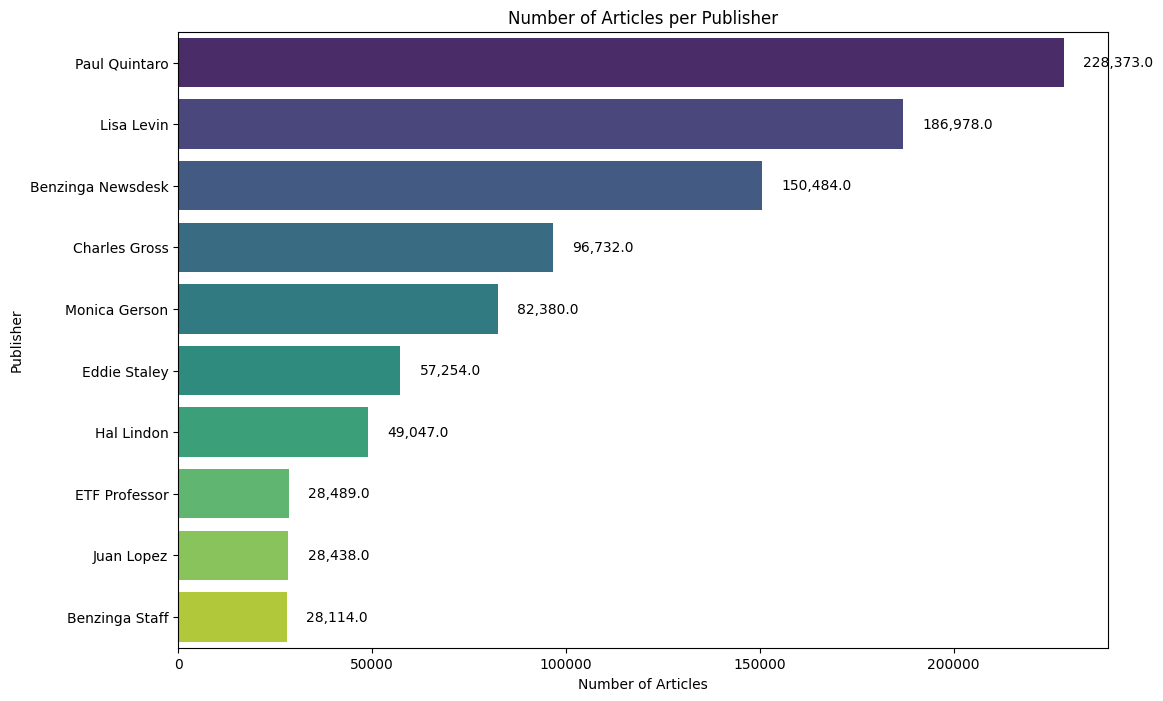

In [47]:
import matplotlib.pyplot as plt

# Plot the number of articles per publisher
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
bars = sns.barplot(x='no_of_articles', y='publisher', 
                   data=top_publisher, 
                   palette='viridis',
                   hue='publisher',
                   ax=ax)

# Add exact numbers at the end of each bar
for bar in bars.patches:
    width = bar.get_width()
    label = f'{width:,}'
    ax.text(width + 5000, bar.get_y() + bar.get_height() / 2, label,
            ha='left', va='center', color='black', fontsize=10)

plt.title('Number of Articles per Publisher')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()


Summary of Most Active Publishers
- Paul Quintaro is the most active publisher with 228,373 articles.
- Lisa Levin follows with 186,978 articles.
- Benzinga Newsdesk has 150,484 articles, making it the third most active.
- Charles Gross and Monica Gerson are also highly active, with 96,732 and 82,380 articles, respectively.
- Eddie Staley, Hal Lindon, ETF Professor, Juan Lopez, and Benzinga Staff are notable contributors, each publishing between 28,114 and 57,254 articles.

### Articles by day of weeks

In [ ]:
# Articles by day of weeks
articles_by_day = eda.articles_by_day_of_week(df).reset_index(name='no_of_articles')
articles_by_day

,day_of_week,no_of_articles
0,Thursday,12688
1,Wednesday,11891
2,Tuesday,11002
3,Monday,10322
4,Friday,9381
5,Sunday,436
6,Saturday,267


The above analysis shows that Thursday is the peak day for publishing articles with 12,688 entries, followed closely by Wednesday and Tuesday with 11,891 and 11,002 articles, respectively. Activity drops significantly on weekends, with Sunday and Saturday seeing only 436 and 267 articles, indicating a clear mid-week publishing trend.

# Sentiment Analysis

In [ ]:
# import the module
import sentiment_analysis as sa
import pandas as pd

# Sentiment Analysis
sentiment_results: pd.DataFrame = sa.sentiment_analysis(df)


Sentiment Analysis Results:
                                            headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday        0.0
1         Stocks That Hit 52-Week Highs On Wednesday        0.0
2                      71 Biggest Movers From Friday        0.0
3       46 Stocks Moving In Friday's Mid-Day Session        0.0
4  B of A Securities Maintains Neutral on Agilent...        0.0


In [ ]:
print("Sentiment Analysis Results:")
sentiment_results.head()

Sentiment Analysis Results:


,headline,sentiment
0,Stocks That Hit 52-Week Highs On Friday,0.0
1,Stocks That Hit 52-Week Highs On Wednesday,0.0
2,71 Biggest Movers From Friday,0.0
3,46 Stocks Moving In Friday's Mid-Day Session,0.0
4,B of A Securities Maintains Neutral on Agilent...,0.0
